Design a single perceptron for classification of linearity seprable binary dataset without using predefined models.using the Perceptron() from sceleton


Identify the problem with single unit perceptron .classify using Or,And and Xor-ed data and analyze the Result

Converged after 2 epochs
Train accuracy: 1.000, Test accuracy: 1.000


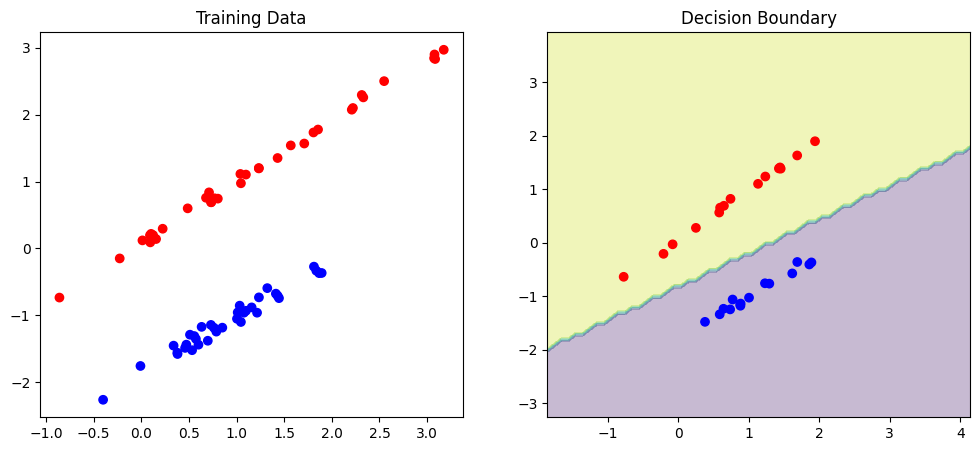

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]
        for epoch in range(self.epochs):
            misclassified = 0
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights)
                pred = 1 if z > 0 else 0
                error = y[idx] - pred
                if error != 0:
                    self.weights += self.lr * error * x_i
                    misclassified += 1
            if misclassified == 0:
                print(f"Converged after {epoch+1} epochs")
                break
        else:
            print(f"Completed {self.epochs} epochs")

    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])]
        z = np.dot(X, self.weights)
        return np.where(z > 0, 1, 0)


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

p = Perceptron(2, lr=0.1)
p.fit(X_train, y_train)

train_acc = 1 - np.mean(p.predict(X_train) != y_train)
test_acc = 1 - np.mean(p.predict(X_test) != y_test)
print(f"Train accuracy: {train_acc:.3f}, Test accuracy: {test_acc:.3f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
ax1.set_title('Training Data')

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.1))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.3)
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')
ax2.set_title('Decision Boundary')
plt.show()




Converged after 6 epochs
AND: accuracy = 1.000, predictions = [0 0 0 1]
Converged after 4 epochs
OR: accuracy = 1.000, predictions = [0 1 1 1]
Completed 20 epochs
XOR: accuracy = 0.500, predictions = [1 1 0 0]


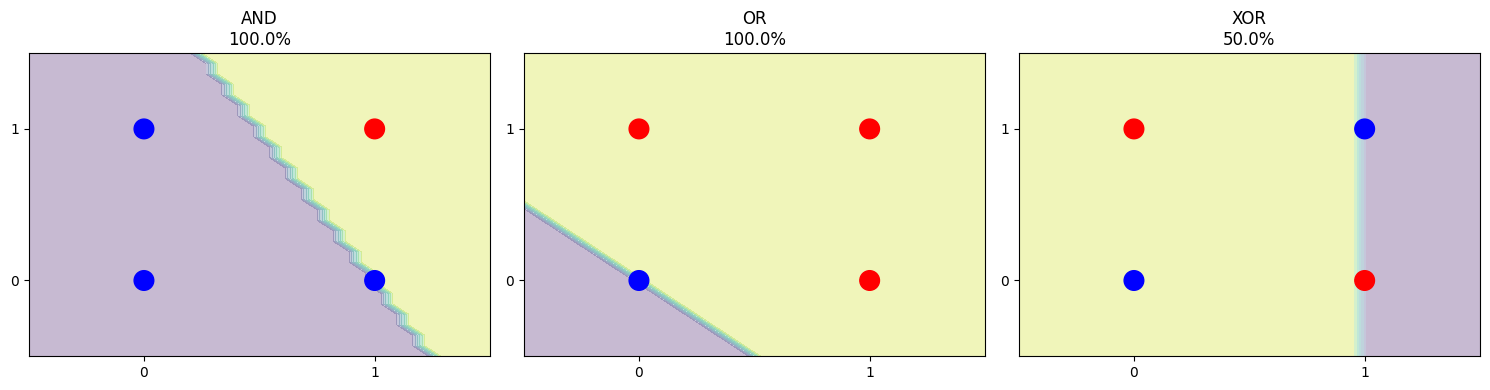


ANALYSIS:
AND: SUCCESS (accuracy: 1.000)
OR: SUCCESS (accuracy: 1.000)
XOR: FAILURE (accuracy: 0.500)

PROBLEM: Single perceptron cannot solve XOR
XOR classes are NOT linearly separable


In [6]:
gates = {
    'AND': (np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,0,0,1])),
    'OR': (np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,1,1,1])),
    'XOR': (np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,1,1,0]))
}

results = {}
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, (Xg, yg)) in enumerate(gates.items()):
    p = Perceptron(2, lr=0.1, epochs=20)
    p.fit(Xg, yg)
    preds = p.predict(Xg)
    acc = 1 - np.mean(preds != yg)
    results[name] = acc

    print(f"{name}: accuracy = {acc:.3f}, predictions = {preds.flatten()}")

    xx, yy = np.meshgrid(np.linspace(-0.5,1.5,30), np.linspace(-0.5,1.5,30))
    Z = p.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(Xg[:,0], Xg[:,1], c=yg, s=200, cmap='bwr')
    axes[i].set_title(f'{name}\n{acc:.1%}')
    axes[i].set_xticks([0,1])
    axes[i].set_yticks([0,1])

plt.tight_layout()
plt.show()

print("\nANALYSIS:")
for name, acc in results.items():
    status = "SUCCESS" if acc == 1.0 else "FAILURE"
    print(f"{name}: {status} (accuracy: {acc:.3f})")

print("\nPROBLEM: Single perceptron cannot solve XOR")
print("XOR classes are NOT linearly separable")
